In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
sales = pd.read_csv("C:/Users/Pratik/Desktop/Internship/raw data/customer_data.csv", sep="\t")

In [3]:
print("Number of data points:", len(sales))

sales.head()

Number of data points: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning and Feature Extraction

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
## removing the rows with missing income values

sales = sales.dropna()
print("Data Points after removing the missing value rows: ", len(sales))

Data Points after removing the missing value rows:  2216


In [12]:

sales["Dt_Customer"] = pd.to_datetime(sales["Dt_Customer"], dayfirst=True)


In [13]:

sales["Dt_Customer"] = pd.to_datetime(sales["Dt_Customer"], format="%d-%m-%Y")


In [14]:
sales["Dt_Customer"] = pd.to_datetime(sales["Dt_Customer"], errors='coerce', dayfirst=True)
print(sales[sales["Dt_Customer"].isna()])  # Check invalid records


Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [15]:
## creating a feature out of 'Dt_Customer' at shows number of days
sales["Dt_Customer"] = pd.to_datetime(sales["Dt_Customer"])
dates = []
for i in sales["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))



The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [18]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
sales["Customer_For"] = days
sales["Customer_For"] = pd.to_numeric(sales["Customer_For"], errors="coerce")

In [21]:
#Feature Engineering
#Age of customer today 
sales["Age"] = 2021-sales["Year_Birth"]

In [22]:
sales["Spent"] = (sales["MntWines"] + sales["MntFruits"] + sales["MntMeatProducts"] +  
                  sales["MntFishProducts"] + sales["MntSweetProducts"] + sales["MntGoldProds"])


In [23]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
sales = sales.drop(to_drop, axis=1)

In [24]:
sales.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2525.000000


## Data Preprocessing

In [40]:
from sklearn.preprocessing import StandardScaler


features = sales[['Age', 'Income', 'Spent']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled features:")
print(scaled_df.head())



Scaled features:
        Age    Income     Spent
0  0.986443  0.234063  1.675488
1  1.236801 -0.234559 -0.962358
2  0.318822  0.769478  0.280250
3 -1.266777 -1.017239 -0.919224
4 -1.016420  0.240221 -0.307044


## Clustering

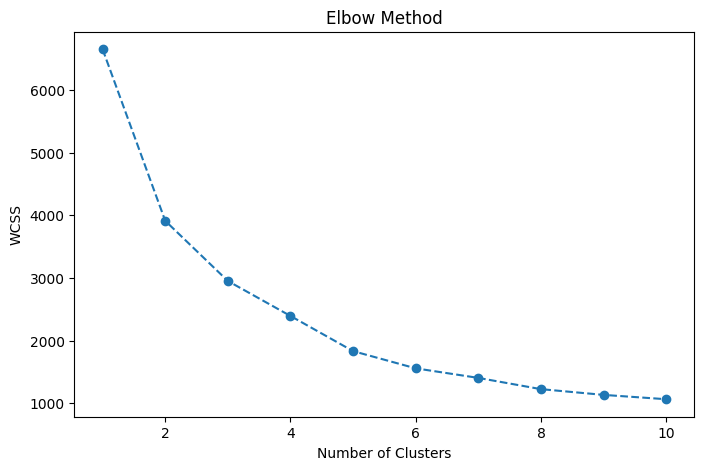

In [39]:
## clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [41]:
## Applying k means clustering
# Optimal number of clusters from the Elbow Method (choose based on the plot)
optimal_clusters = 4  # Example


kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
sales['Cluster'] = kmeans.fit_predict(scaled_features)

print("\nClustered dataset:")
print(sales.head())




Clustered dataset:
    Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation  58138.0        0         0       58       635         88   
1  Graduation  46344.0        1         1       38        11          1   
2  Graduation  71613.0        0         0       26       426         49   
3  Graduation  26646.0        1         0       26        11          4   
4         PhD  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp4  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0    

## Visualization

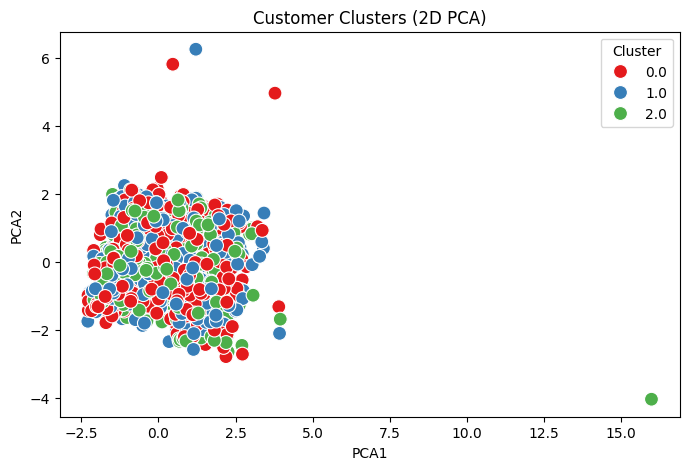

In [46]:
## 2D Scatter Plot

from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA components and clusters
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = sales['Cluster']

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100)
plt.title('Customer Clusters (2D PCA)')
plt.show()


In [ ]:
## pair plots

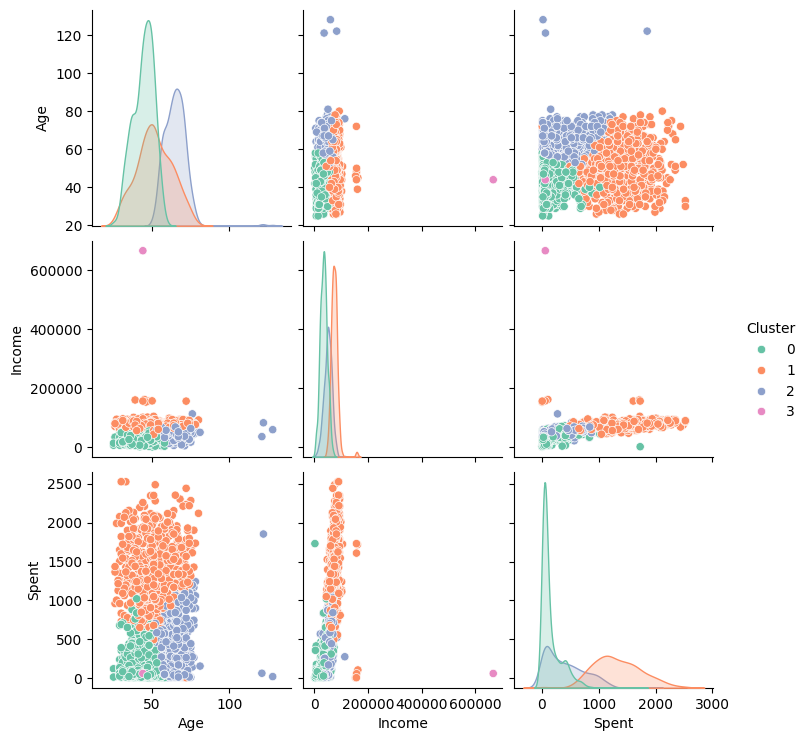

In [35]:
sns.pairplot(sales[['Age', 'Income', 'Spent', 'Cluster']], hue='Cluster', palette='Set2')
plt.show()


In [36]:
## Centoid Visualization
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features.columns)

print("\nCentroids of clusters:")
print(centroids_df)




Centroids of clusters:
        Age     Income     Spent
0 -0.664558  -0.696772 -0.754073
1 -0.064854   0.875130  1.193879
2  1.050829  -0.076586 -0.335088
3 -0.682609  24.413282 -0.904293


In [47]:
# Analyze clusters for actionable insights
for cluster in sales['Cluster'].unique():
    cluster_data = sales[sales['Cluster'] == cluster]
    print(f"\nCluster {cluster} Analysis:")
    print(cluster_data.describe())

print("\nRecommendations:")
print("- Target customers in high-income, high-spending clusters for premium products.")
print("- Introduce loyalty programs for high-spending customers.")
print("- Design tailored promotions for age-specific or income-specific segments.")



Cluster 1 Analysis:
              Income     Kidhome    Teenhome     Recency     MntWines  \
count     728.000000  728.000000  728.000000  728.000000   728.000000   
mean    74271.984890    0.089286    0.395604   49.696429   661.876374   
std     13150.391059    0.290132    0.529807   29.026476   310.165477   
min     44802.000000    0.000000    0.000000    0.000000     1.000000   
25%     66326.250000    0.000000    0.000000   25.000000   423.000000   
50%     73452.000000    0.000000    0.000000   51.500000   626.000000   
75%     80881.500000    0.000000    1.000000   74.000000   896.250000   
max    162397.000000    2.000000    2.000000   99.000000  1493.000000   

        MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  728.000000       728.000000       728.000000        728.000000   
mean    58.048077       390.817308        82.188187         59.170330   
std     49.773536       248.609566        67.634844         50.875429   
min      0.000000         1.0